In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('../input/data.csv');

print("\n \t The data frame has {0[0]} rows and {0[1]} columns. \n".format(data.shape))
#data.info()

data.head(3)


 	 The data frame has 569 rows and 33 columns. 



,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


In [3]:
data.drop(data.columns[[-1, 0]], axis=1, inplace=True)

#data.info()
data.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
#data['diagnosis'].value_counts()

In [5]:
diagnosis_all = list(data.shape)[0]
diagnosis_categories = list(data['diagnosis'].value_counts())

print("\n \t The data has {} diagnosis, {} malignant and {} benign.".format(diagnosis_all, 
                                                                                 diagnosis_categories[0], 
                                                                                 diagnosis_categories[1]))


 	 The data has 569 diagnosis, 357 malignant and 212 benign.


In [6]:
features_mean= list(data.columns[1:11])


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


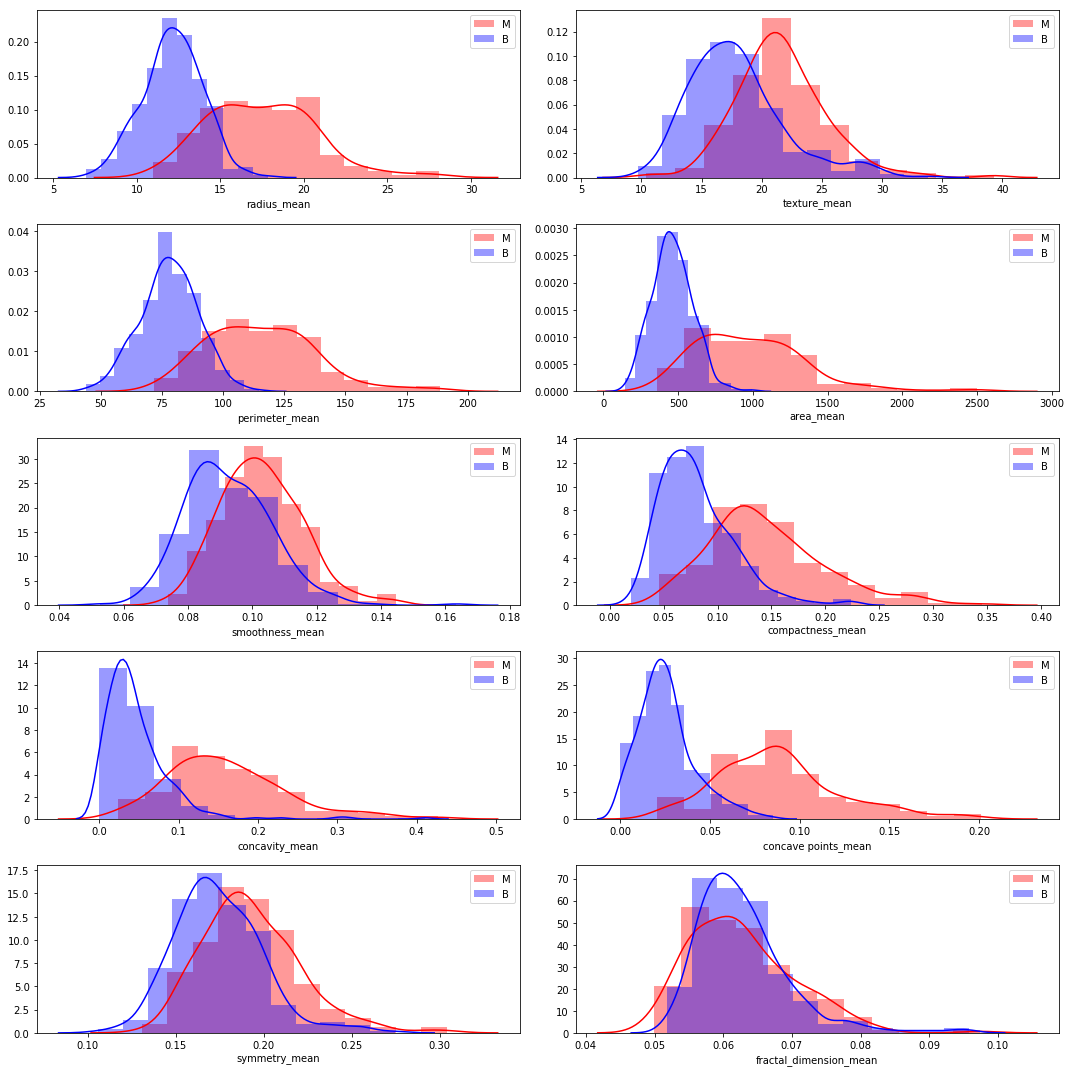

In [7]:
bins = 12
plt.figure(figsize=(15,15))
for i, feature in enumerate(features_mean):
    rows = int(len(features_mean)/2)
    
    plt.subplot(rows, 2, i+1)
    
    sns.distplot(data[data['diagnosis']=='M'][feature], bins=bins, color='red', label='M');
    sns.distplot(data[data['diagnosis']=='B'][feature], bins=bins, color='blue', label='B');
    
    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [8]:
features_selection = ['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean']

In [9]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

import time

In [10]:
diag_map = {'M':1, 'B':0}
data['diagnosis'] = data['diagnosis'].map(diag_map)

In [11]:
X = data.loc[:,features_mean]
y = data.loc[:, 'diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

accuracy_all = []
cvs_all = []


SGD Classifier Accuracy: 77.19%
Cross validation score: 79.97% (+/- 3.37%)
Execution time: 0.032086 seconds 



/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=No

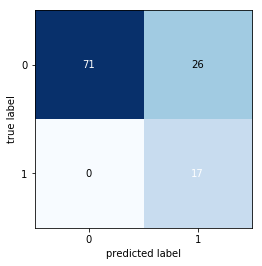

In [12]:

from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix 

start = time.time()

clf = SGDClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("SGD Classifier Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

result=confusion_matrix(prediction, y_test)
from mlxtend.plotting import plot_confusion_matrix
fig, ax=plot_confusion_matrix(conf_mat=result , figsize=(4,4))
plt.show()


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

SVC Accuracy: 69.30%
Cross validation score: 71.70% (+/- 4.07%)
Execution time: 0.11156 seconds 



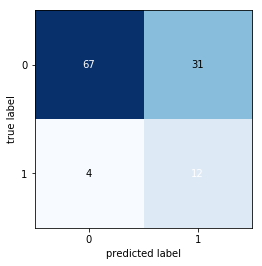

In [13]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix 

start = time.time()

clf = SVC()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("SVC Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

result=confusion_matrix(prediction, y_test)
from mlxtend.plotting import plot_confusion_matrix
fig, ax=plot_confusion_matrix(conf_mat=result , figsize=(4,4))
plt.show()


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC Accuracy: 78.07%
Cross validation score: 82.96% (+/- 9.79%)
Execution time: 0.18926 seconds 



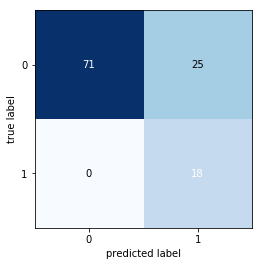

In [14]:
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix 
start = time.time()

clf = LinearSVC()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("LinearSVC Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

result=confusion_matrix(prediction, y_test)
from mlxtend.plotting import plot_confusion_matrix
fig, ax=plot_confusion_matrix(conf_mat=result , figsize=(4,4))
plt.show() 


Accuracy: 93.86%
Cross validation score: 88.60% (+/- 6.96%)
Execution time: 0.033659 seconds 



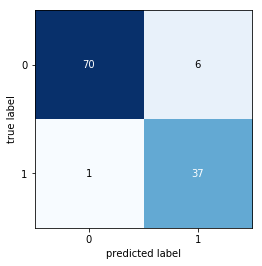

In [15]:

from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix 

start = time.time()

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

result=confusion_matrix(prediction, y_test)
from mlxtend.plotting import plot_confusion_matrix
fig, ax=plot_confusion_matrix(conf_mat=result , figsize=(4,4))
plt.show()


Accuracy: 94.74%
Cross validation score: 91.40% (+/- 5.03%)
Execution time: 0.028511 seconds 



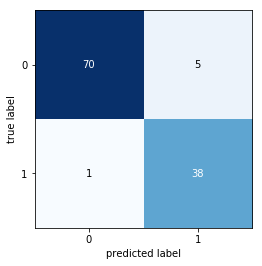

In [16]:
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix 

start = time.time()

clf = GaussianNB()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

result=confusion_matrix(prediction, y_test)
from mlxtend.plotting import plot_confusion_matrix
fig, ax=plot_confusion_matrix(conf_mat=result , figsize=(4,4))
plt.show()


 LogisticRegression Accuracy: 93.86%
Cross validation score: 90.35% (+/- 4.82%)
Execution time: 0.052715 seconds 



/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

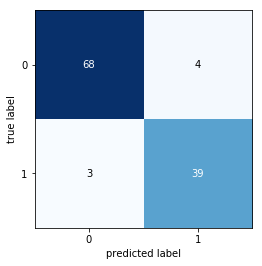

In [17]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix 
start = time.time()

clf =  LogisticRegression()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print(" LogisticRegression Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

result=confusion_matrix(prediction, y_test)
from mlxtend.plotting import plot_confusion_matrix
fig, ax=plot_confusion_matrix(conf_mat=result , figsize=(4,4))
plt.show()


Random Forest Accuracy: 93.86%
Cross validation score: 94.57% (+/- 6.03%)
Execution time: 0.10849 seconds 



/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


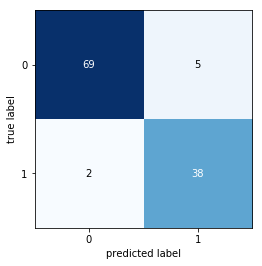

In [18]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix 

start = time.time()

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Random Forest Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

result=confusion_matrix(prediction, y_test)
from mlxtend.plotting import plot_confusion_matrix
fig, ax=plot_confusion_matrix(conf_mat=result , figsize=(4,4))
plt.show()



Dedicion Tree Accuracy: 92.11%
Cross validation score: 91.24% (+/- 6.23%)
Execution time: 0.037428 seconds 



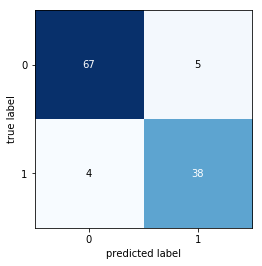

In [19]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix 

start = time.time()

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Dedicion Tree Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))
result=confusion_matrix(prediction, y_test)
from mlxtend.plotting import plot_confusion_matrix
fig, ax=plot_confusion_matrix(conf_mat=result , figsize=(4,4))
plt.show()


In [20]:
X = data.loc[:,features_selection]
y = data.loc[:, 'diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

accuracy_selection = []
cvs_selection = []

SGD Classifier Accuracy: 85.96%
Cross validation score: 65.59% (+/- 43.73%)
Execution time: 0.028173 seconds 



/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=No

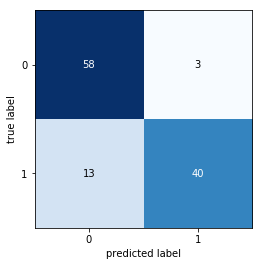

In [21]:
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix 

start = time.time()

clf = SGDClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_selection.append(accuracy_score(prediction, y_test))
cvs_selection.append(np.mean(scores))

print("SGD Classifier Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: %s seconds \n" % "{0:.5}".format(end-start))

result=confusion_matrix(prediction, y_test)
from mlxtend.plotting import plot_confusion_matrix
fig, ax=plot_confusion_matrix(conf_mat=result , figsize=(4,4))
plt.show()


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

SVC Accuracy: 74.56%
Cross validation score: 78.20% (+/- 8.67%)
Execution time: 0.11743 seconds 



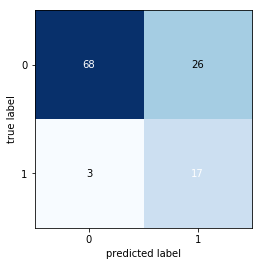

In [22]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix 

start = time.time()

clf = SVC()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_selection.append(accuracy_score(prediction, y_test))
cvs_selection.append(np.mean(scores))

print("SVC Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: %s seconds \n" % "{0:.5}".format(end-start))

result=confusion_matrix(prediction, y_test)
from mlxtend.plotting import plot_confusion_matrix
fig, ax=plot_confusion_matrix(conf_mat=result , figsize=(4,4))
plt.show () 



/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC Accuracy: 90.35%
Cross validation score: 74.48% (+/- 35.49%)
Execution time: 0.16781 seconds 



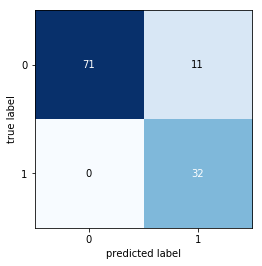

In [23]:
from sklearn.svm import  LinearSVC
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix 
start = time.time()

clf = LinearSVC()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_selection.append(accuracy_score(prediction, y_test))
cvs_selection.append(np.mean(scores))

print("LinearSVC Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: %s seconds \n" % "{0:.5}".format(end-start))

result=confusion_matrix(prediction, y_test)
from mlxtend.plotting import plot_confusion_matrix
fig, ax=plot_confusion_matrix(conf_mat=result , figsize=(4,4))
plt.show()


Accuracy: 92.11%
Cross validation score: 88.25% (+/- 6.91%)
Execution time: 0.034709 seconds 



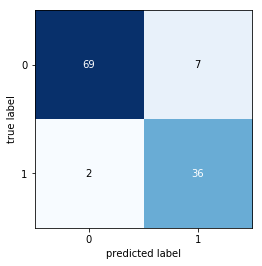

In [24]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix 

start = time.time()

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_selection.append(accuracy_score(prediction, y_test))
cvs_selection.append(np.mean(scores))

print("Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: %s seconds \n" % "{0:.5}".format(end-start))

result=confusion_matrix(prediction, y_test)
from mlxtend.plotting import plot_confusion_matrix
fig, ax=plot_confusion_matrix(conf_mat=result , figsize=(4,4))
plt.show()


Accuracy: 94.74%
Cross validation score: 90.88% (+/- 5.83%)
Execution time: 0.02675 seconds 



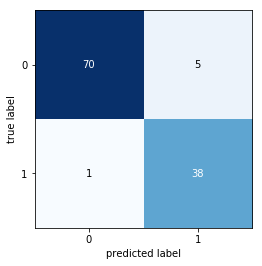

In [25]:
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix 

start = time.time()

clf = GaussianNB()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_selection.append(accuracy_score(prediction, y_test))
cvs_selection.append(np.mean(scores))

print("Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: %s seconds \n" % "{0:.5}".format(end-start))

result=confusion_matrix(prediction, y_test)
from mlxtend.plotting import plot_confusion_matrix
fig, ax=plot_confusion_matrix(conf_mat=result , figsize=(4,4))
plt.show()


Accuracy: 93.86%
Cross validation score: 89.30% (+/- 6.43%)
Execution time: 0.046492 seconds 



/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

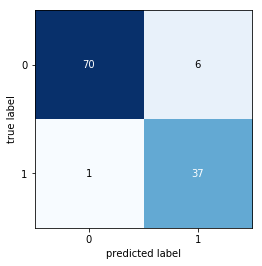

In [26]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix 
start = time.time()

clf = LogisticRegression()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_selection.append(accuracy_score(prediction, y_test))
cvs_selection.append(np.mean(scores))

print("Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: %s seconds \n" % "{0:.5}".format(end-start))

result=confusion_matrix(prediction, y_test)
from mlxtend.plotting import plot_confusion_matrix
fig, ax=plot_confusion_matrix(conf_mat=result , figsize=(4,4))
plt.show()


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest Accuracy: 93.86%
Cross validation score: 92.28% (+/- 4.23%)
Execution time: 0.11074 seconds 



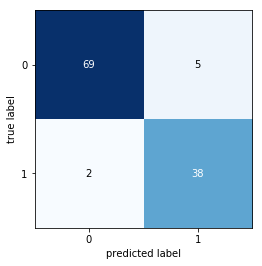

In [27]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix 

start = time.time()

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_selection.append(accuracy_score(prediction, y_test))
cvs_selection.append(np.mean(scores))

print("Random Forest Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: %s seconds \n" % "{0:.5}".format(end-start))

result=confusion_matrix(prediction, y_test)
from mlxtend.plotting import plot_confusion_matrix
fig, ax=plot_confusion_matrix(conf_mat=result , figsize=(4,4))
plt.show()


Dedicion Tree Accuracy: 89.47%
Cross validation score: 91.04% (+/- 3.69%)
Execution time: 0.027046 seconds 



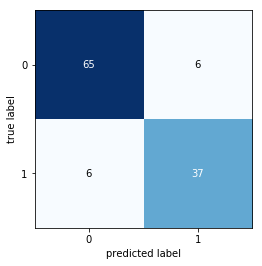

In [28]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix 

start = time.time()

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_selection.append(accuracy_score(prediction, y_test))
cvs_selection.append(np.mean(scores))

print("Dedicion Tree Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: %s seconds \n" % "{0:.5}".format(end-start))




result=confusion_matrix(prediction, y_test)
from mlxtend.plotting import plot_confusion_matrix
fig, ax=plot_confusion_matrix(conf_mat=result , figsize=(4,4))
plt.show()


In [29]:
diff_accuracy = list(np.array(accuracy_selection) - np.array(accuracy_all))
diff_cvs = list(np.array(cvs_selection) - np.array(cvs_all))

d = {'accuracy_all':accuracy_all, 'accuracy_selection':accuracy_selection, 'diff_accuracy':diff_accuracy, 
     'cvs_all':cvs_all, 'cvs_selection':cvs_selection, 'diff_cvs':diff_cvs,}

index = ['SGD', 'SVC', 'LinearSVC', 'KNeighbors', 'GaussianNB', 'LogisticRegression','RandomForest','DecisionTree']

df = pd.DataFrame(d, index=index)

In [30]:
df

,accuracy_all,accuracy_selection,diff_accuracy,cvs_all,cvs_selection,diff_cvs
SGD,0.771930,0.859649,0.087719,0.799738,0.655929,-0.143809
SVC,0.692982,0.745614,0.052632,0.717045,0.782008,0.064963
LinearSVC,0.780702,0.903509,0.122807,0.829611,0.744779,-0.084833
KNeighbors,0.938596,0.921053,-0.017544,0.886002,0.882493,-0.003509
GaussianNB,0.947368,0.947368,0.000000,0.914013,0.908765,-0.005248
LogisticRegression,0.938596,0.938596,0.000000,0.903517,0.893020,-0.010496
RandomForest,0.938596,0.938596,0.000000,0.945748,0.922832,-0.022917
DecisionTree,0.921053,0.894737,-0.026316,0.912366,0.910442,-0.001924
